In [4]:
import numpy as np 
from prophet import Prophet
from prophet.plot import plot_plotly, plot_components_plotly
from prophet.diagnostics import cross_validation
from prophet.diagnostics import performance_metrics
import warnings
warnings.filterwarnings('ignore')  
warnings.simplefilter(action = "ignore", category = RuntimeWarning)
import datetime as dt
import pandas as pd
pd.core.common.is_list_like = pd.api.types.is_list_like
import pandas_datareader.data as web
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates
import pandas as pd
from plotnine import *
import io

import statistics as st
%matplotlib inline
import matplotlib.dates as mdates
from pandas import DataFrame
from pandas import to_datetime
from statsmodels.tsa.stattools import kpss
from statsmodels.tsa.stattools import adfuller
from  sklearn.metrics import mean_absolute_error

In [5]:
df = pd.read_csv('../data/Agri_all.csv')
df

,YMD,YM,MD,Product,Price,KRW_USD_EXR,Annual_Call_Rate,item_PPI,item_CPI,Food_Price_Index,Cereals_Price_Index,DayAvg_Temperature,DayDiff_Temperature,DayAvg_RelativeHumidity,DaySum_Rainfall,DayAvg_WindSpeed,DaySum_Sunshine,Warning_Count
0,2005-01-03,200501,103,마늘,20785.714286,1013.00,3.33,49.58,58.27,65.4,60.5,4.400000,12.800000,35.200000,0.000000,2.600000,1.600000,0.000000
1,2005-01-04,200501,104,마늘,20785.714286,1013.00,3.33,49.58,58.27,65.4,60.5,-0.200000,8.800000,26.000000,0.000000,2.800000,2.800000,0.000000
2,2005-01-05,200501,105,마늘,20928.571429,1013.00,3.33,49.58,58.27,65.4,60.5,-1.400000,11.200000,33.400000,0.000000,0.600000,3.200000,0.000000
3,2005-01-06,200501,106,마늘,21071.428571,1013.00,3.33,49.58,58.27,65.4,60.5,2.800000,7.800000,31.200000,1.200000,1.200000,2.600000,0.000000
4,2005-01-07,200501,107,마늘,21071.428571,1013.00,3.33,49.58,58.27,65.4,60.5,2.000000,7.600000,28.400000,0.000000,2.800000,2.800000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15875,2020-12-24,202012,1224,고구마,10258.695652,1180.05,0.70,137.90,96.13,108.6,116.4,3.529412,8.588235,59.117647,0.000000,1.705882,3.529412,0.000000
15876,2020-12-28,202012,1228,고구마,10431.323529,1180.05,0.70,137.90,96.13,108.6,116.4,3.941176,11.941176,80.352941,0.058824,0.411765,3.117647,0.000000
15877,2020-12-29,202012,1229,고구마,10431.323529,1180.05,0.70,137.90,96.13,108.6,116.4,1.590909,9.227273,77.227273,1.272727,1.863636,0.636364,0.772727
15878,2020-12-30,202012,1230,고구마,10460.735294,1180.05,0.70,137.90,96.13,108.6,116.4,-5.500000,6.250000,65.375000,0.291667,3.958333,2.666667,0.833333


In [6]:
df = df[df['Product'] == '감자']
df.rename(columns = {'YMD' : 'ds', 'Price' : 'y'}, inplace=True)
df = df.reset_index()
df = df.drop(columns='index')
df

,ds,YM,MD,Product,y,KRW_USD_EXR,Annual_Call_Rate,item_PPI,item_CPI,Food_Price_Index,Cereals_Price_Index,DayAvg_Temperature,DayDiff_Temperature,DayAvg_RelativeHumidity,DaySum_Rainfall,DayAvg_WindSpeed,DaySum_Sunshine,Warning_Count
0,2005-01-03,200501,103,감자,6323.101449,1013.00,3.33,71.15,69.162,65.4,60.5,4.500000,6.750000,47.750000,1.000000,3.750000,0.250000,0.000000
1,2005-01-04,200501,104,감자,6233.314286,1013.00,3.33,71.15,69.162,65.4,60.5,-2.250000,8.000000,36.250000,0.000000,3.000000,3.500000,0.000000
2,2005-01-05,200501,105,감자,6332.028169,1013.00,3.33,71.15,69.162,65.4,60.5,-3.500000,11.500000,44.750000,0.000000,0.500000,4.250000,0.000000
3,2005-01-06,200501,106,감자,6417.352113,1013.00,3.33,71.15,69.162,65.4,60.5,1.500000,7.000000,45.250000,1.500000,1.500000,2.250000,0.000000
4,2005-01-07,200501,107,감자,6581.362319,1013.00,3.33,71.15,69.162,65.4,60.5,0.250000,9.250000,38.750000,0.000000,3.000000,4.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3965,2020-12-24,202012,1224,감자,4937.806452,1180.05,0.70,107.24,102.430,108.6,116.4,3.481481,8.555556,58.259259,0.000000,2.148148,4.259259,0.333333
3966,2020-12-28,202012,1228,감자,5033.016393,1180.05,0.70,107.24,102.430,108.6,116.4,3.750000,11.416667,82.083333,0.000000,0.333333,3.541667,0.041667
3967,2020-12-29,202012,1229,감자,5015.548387,1180.05,0.70,107.24,102.430,108.6,116.4,1.714286,9.035714,83.107143,0.678571,1.571429,0.750000,0.785714
3968,2020-12-30,202012,1230,감자,5016.354839,1180.05,0.70,107.24,102.430,108.6,116.4,-5.766667,8.166667,62.033333,1.800000,3.866667,2.600000,0.833333


In [7]:
start_date = pd.to_datetime('2005-01-01') ## 시작 날짜
end_date = pd.to_datetime('2020-12-31') ## 마지막 날짜
 
dates = pd.date_range(start_date,end_date,freq='D') ## 일단위로 생성
dates = pd.DataFrame(dates)
dates = dates.rename(columns={0 : 'ds'})
dates

,ds
0,2005-01-01
1,2005-01-02
2,2005-01-03
3,2005-01-04
4,2005-01-05
...,...
5839,2020-12-27
5840,2020-12-28
5841,2020-12-29
5842,2020-12-30


In [8]:
df['ds'] = pd.to_datetime(df['ds'])

In [9]:
def _fig_plot(df, X, Y):
  ''' Function plots the data. requires to provide dataframe in the
  format of date as ds, observation as y, Preset other variables e.g., axis name
  '''
  df.plot(x = X, y = Y, figsize=Figsize, label = Label)
  plt.xlabel(xAxisLabel, fontsize = 16) # matplotlib.pyplot
  plt.ylabel(yAxisLabel, fontsize = 16)
  plt.legend()
  plt.title(Title, fontsize = 20)
  ax = plt.gca().get_xaxis()

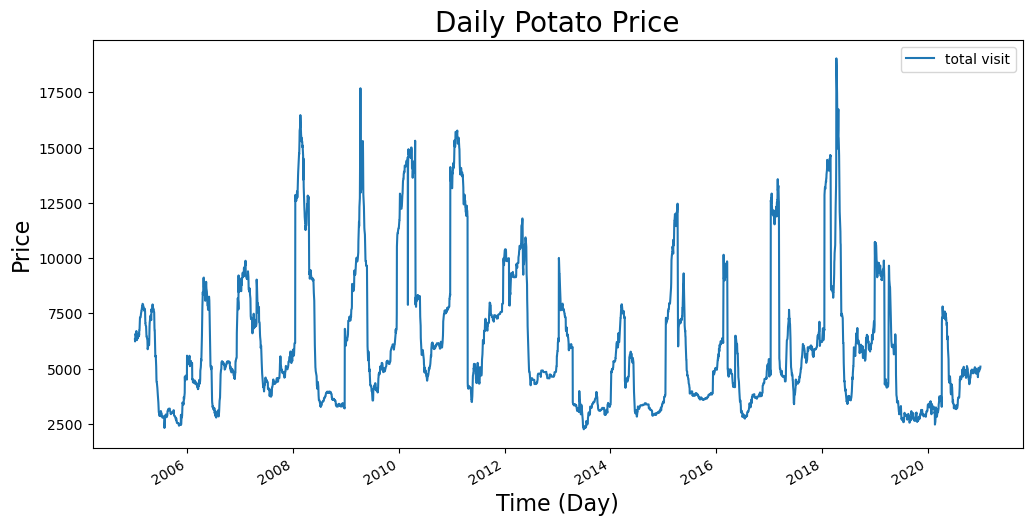

In [10]:
X = 'ds'
Y = 'y'
Label = "total visit"
Figsize = (12,6)
Title = "Daily Potato Price"
xAxisLabel = 'Time (Day)'
yAxisLabel = 'Price'
_fig_plot(df, X, Y)

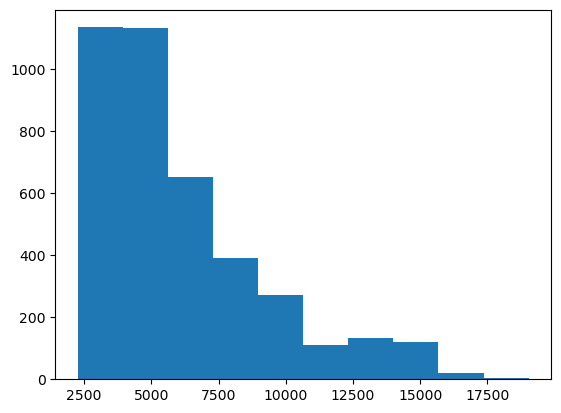

In [11]:
plt.hist(df.y)
plt.show()

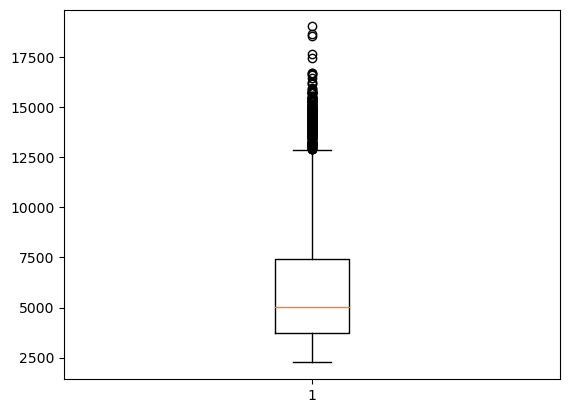

In [12]:
plt.boxplot(df.y)
plt.show()

In [13]:
df_raw = df.copy()
df['y'] = np.log(df['y'])

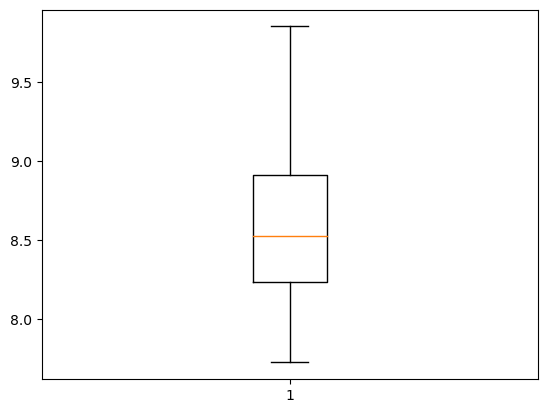

In [14]:
plt.boxplot(df.y.values)
plt.show()

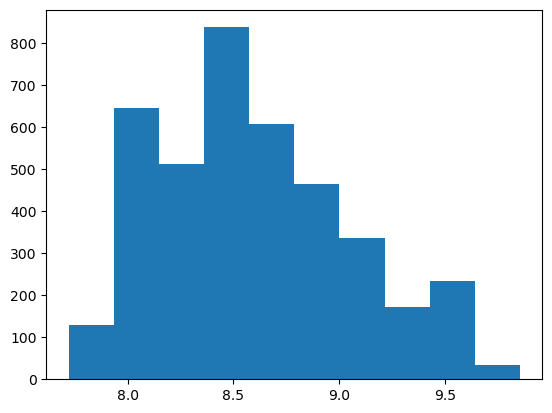

In [15]:
plt.hist(df.y)
plt.show()

In [16]:
Q1=df.y.quantile(0.25)
Q3=df.y.quantile(0.75)
IQR = Q3-Q1
LT=Q1-1.5*IQR
HT= Q3+1.5*IQR
print(LT, HT)
df['outlier']=np.where(((df['y']<LT)|(df['y']>HT)),'yes','no')

7.211399328373522 9.930067321047735


In [17]:
df['outlier'].value_counts()

no    3970
Name: outlier, dtype: int64

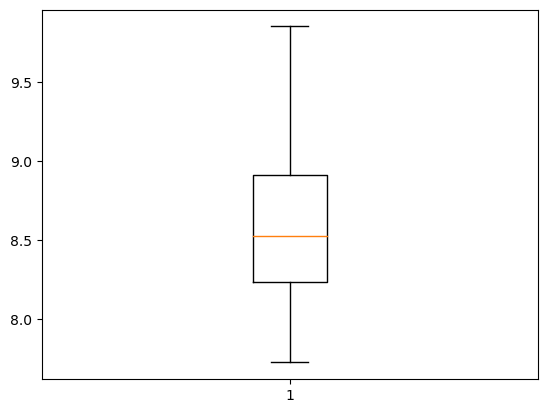

In [18]:
plt.boxplot(df[df.outlier=='no'].y)
plt.show()

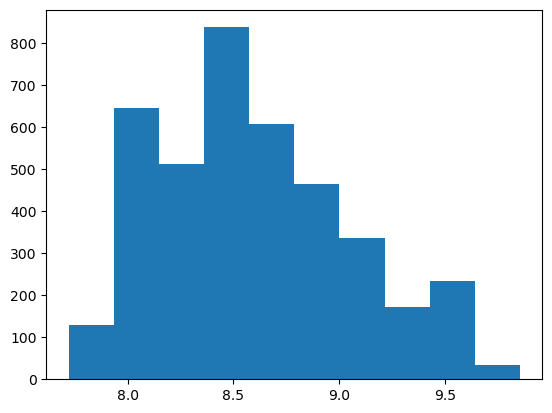

In [19]:
plt.hist(df[df.outlier=='no'].y)
plt.show()

In [20]:
df = pd.merge(dates, df, how='outer', on='ds')
df

,ds,YM,MD,Product,y,KRW_USD_EXR,Annual_Call_Rate,item_PPI,item_CPI,Food_Price_Index,Cereals_Price_Index,DayAvg_Temperature,DayDiff_Temperature,DayAvg_RelativeHumidity,DaySum_Rainfall,DayAvg_WindSpeed,DaySum_Sunshine,Warning_Count,outlier
0,2005-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2005-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2005-01-03,200501.0,103.0,감자,8.751965,1013.00,3.33,71.15,69.162,65.4,60.5,4.500000,6.750000,47.750000,1.000000,3.750000,0.250000,0.000000,no
3,2005-01-04,200501.0,104.0,감자,8.737663,1013.00,3.33,71.15,69.162,65.4,60.5,-2.250000,8.000000,36.250000,0.000000,3.000000,3.500000,0.000000,no
4,2005-01-05,200501.0,105.0,감자,8.753376,1013.00,3.33,71.15,69.162,65.4,60.5,-3.500000,11.500000,44.750000,0.000000,0.500000,4.250000,0.000000,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5839,2020-12-27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5840,2020-12-28,202012.0,1228.0,감자,8.523775,1180.05,0.70,107.24,102.430,108.6,116.4,3.750000,11.416667,82.083333,0.000000,0.333333,3.541667,0.041667,no
5841,2020-12-29,202012.0,1229.0,감자,8.520298,1180.05,0.70,107.24,102.430,108.6,116.4,1.714286,9.035714,83.107143,0.678571,1.571429,0.750000,0.785714,no
5842,2020-12-30,202012.0,1230.0,감자,8.520459,1180.05,0.70,107.24,102.430,108.6,116.4,-5.766667,8.166667,62.033333,1.800000,3.866667,2.600000,0.833333,no


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


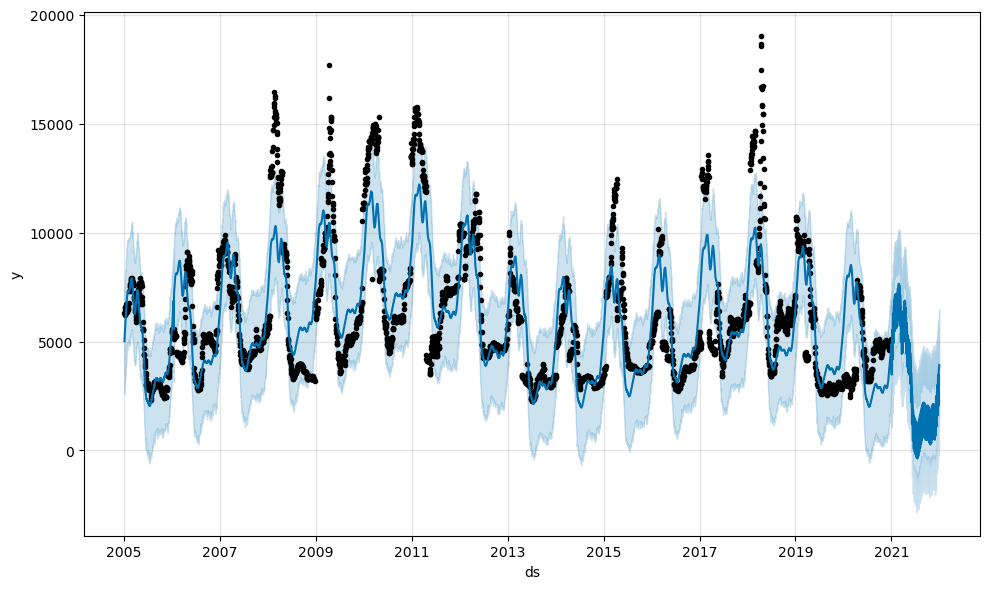

In [21]:
m = Prophet()
m.fit(df_raw)
future = m.make_future_dataframe(periods=365)
forecast = m.predict(future)
fig = m.plot(forecast)
plt.show()

In [22]:
# evaluation_model = cross_validation(m, initial='730 days', period='180 days', horizon = '30 days')
# evaluation_metrix = performance_metrics(evaluation_model)
# evaluation_metrix.head(5)

In [23]:
from sklearn.model_selection import ParameterGrid
params_grid = {
              'seasonality_mode':('multiplicative','additive'),
               'changepoint_prior_scale':[0.1,0.2,0.3,0.4,0.5],
              'holidays_prior_scale':[0.1,0.2,0.3,0.4,0.5],
              'n_changepoints' : [100,150,200]
               }
grid = ParameterGrid(params_grid)
cnt = 0
for p in grid:
    cnt = cnt+1

print('Total Possible Models',cnt)

Total Possible Models 150


In [24]:
df[df['ds'] == '2019-12-31']

,ds,YM,MD,Product,y,KRW_USD_EXR,Annual_Call_Rate,item_PPI,item_CPI,Food_Price_Index,Cereals_Price_Index,DayAvg_Temperature,DayDiff_Temperature,DayAvg_RelativeHumidity,DaySum_Rainfall,DayAvg_WindSpeed,DaySum_Sunshine,Warning_Count,outlier
5477,2019-12-31,201912.0,1231.0,감자,8.036201,1157.8,1.59,70.29,74.752,101.0,97.4,-3.740741,6.444444,46.666667,0.0,2.888889,5.0,0.962963,no


In [25]:
train = df.iloc[:5478]      
test = df.iloc[5478:]

In [26]:
print('Training data, last date: ' + str(train.tail(1)['ds']) + ' ' + 'testing data, last date: ' + str(test.tail(1)['ds']))

Training data, last date: 5477   2019-12-31
Name: ds, dtype: datetime64[ns] testing data, last date: 5843   2020-12-31
Name: ds, dtype: datetime64[ns]


In [27]:
# 휴일 생성
import holidays

# 필요한 날짜만큼 생성
date_list = pd.date_range('2010-01-01', '2020-12-31')

# 한국 휴일 객체 생성
kr_holidays = holidays.KR()

# generate holiday table
holiday = pd.DataFrame(columns=['ds','holiday'])
holiday['ds'] = sorted(date_list)
holiday['holiday'] = holiday.ds.apply(lambda x: kr_holidays.get(x) if x in kr_holidays else 'non-holiday')
holiday.head()

,ds,holiday
0,2010-01-01,New Year's Day
1,2010-01-02,non-holiday
2,2010-01-03,non-holiday
3,2010-01-04,non-holiday
4,2010-01-05,non-holiday


# 그리드서치

In [28]:
# model_parameters = pd.DataFrame(columns = ['MAE','Parameters'])
# for p in grid:
#     LOL = pd.DataFrame()
#     print(p)
# #    random.seed(0)
#     train_model =Prophet(changepoint_prior_scale = p['changepoint_prior_scale'],
#                          holidays_prior_scale = p['holidays_prior_scale'],
#                          n_changepoints = p['n_changepoints'],
#                          seasonality_mode = p['seasonality_mode'],
                         
#                          daily_seasonality = True,
#                          yearly_seasonality = True,
#                          holidays=holiday_df, 
#                          interval_width=0.95)
    
#     train_model.fit(train)
#     future = train_model.make_future_dataframe(periods=248, freq='D',include_history = False)
#     train_forecast = train_model.predict(future)
#     LOL=train_forecast[['ds','yhat']]
#     y_true= test['y'].values
#     y_pred = LOL['yhat'][:len(y_true)].values
#     mae = mean_absolute_error(y_true, y_pred)
#     print('Mean Absolute Error: %.3f' % mae)
#     model_parameters = model_parameters.append({'MAE':mae,'Parameters':p},ignore_index=True)

In [29]:
# parameters = model_parameters.sort_values(by=['MAE'])
# parameters = parameters.reset_index(drop=True)
# parameters.head()

In [30]:
# parameters['Parameters'][0]

In [31]:
df.columns

Index(['ds', 'YM', 'MD', 'Product', 'y', 'KRW_USD_EXR', 'Annual_Call_Rate',
       'item_PPI', 'item_CPI', 'Food_Price_Index', 'Cereals_Price_Index',
       'DayAvg_Temperature', 'DayDiff_Temperature', 'DayAvg_RelativeHumidity',
       'DaySum_Rainfall', 'DayAvg_WindSpeed', 'DaySum_Sunshine',
       'Warning_Count', 'outlier'],
      dtype='object')

In [41]:
train = train.drop(columns=['YM', 'MD', 'Product', 'KRW_USD_EXR', 'Annual_Call_Rate',
       'item_PPI', 'item_CPI', 'Food_Price_Index', 'Cereals_Price_Index', 'outlier'
       ])
train['Warning_Count'] = np.exp(train['Warning_Count'])
train.columns

KeyError: "['YM', 'MD', 'Product', 'KRW_USD_EXR', 'Annual_Call_Rate', 'item_PPI', 'item_CPI', 'Food_Price_Index', 'Cereals_Price_Index'] not found in axis"

In [33]:
final_model = Prophet(holidays=holiday,
                      changepoint_prior_scale= 0.5,
                      holidays_prior_scale = 0.2,
                      n_changepoints = 35,
                      seasonality_mode = 'multiplicative',
                      weekly_seasonality=True,
                      daily_seasonality = True,
                      yearly_seasonality = True,
                      interval_width=0.95)
final_model.fit(train)

In [34]:
future = final_model.make_future_dataframe(periods=366, freq='D')
forecast = final_model.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(7)

,ds,yhat,yhat_lower,yhat_upper
5837,2020-12-25,8.388835,3.680523,12.299764
5838,2020-12-26,8.352625,3.618312,12.193058
5839,2020-12-27,8.462279,3.439555,12.349743
5840,2020-12-28,8.340676,3.560896,12.228867
5841,2020-12-29,8.349113,3.531910,12.204352
5842,2020-12-30,8.366763,3.480376,12.265764
5843,2020-12-31,8.378053,3.575020,12.243505


In [35]:
# figure = plt.figure(figsize=(12, 6), dpi=80)
# plt.plot(y_true, label='Actual')
# plt.plot(y_pred, label='Predicted')
# plt.xlabel('Time ->>>', fontsize = 18)
# plt.ylabel('$ Price ->>>', fontsize = 18)
# plt.title('Stock price prediction with Fb Prophet', fontsize = 26)
# plt.legend()
# plt.show()

In [36]:
df['y']=np.exp(df['y'])
forecast['yhat']=np.exp(forecast['yhat'])

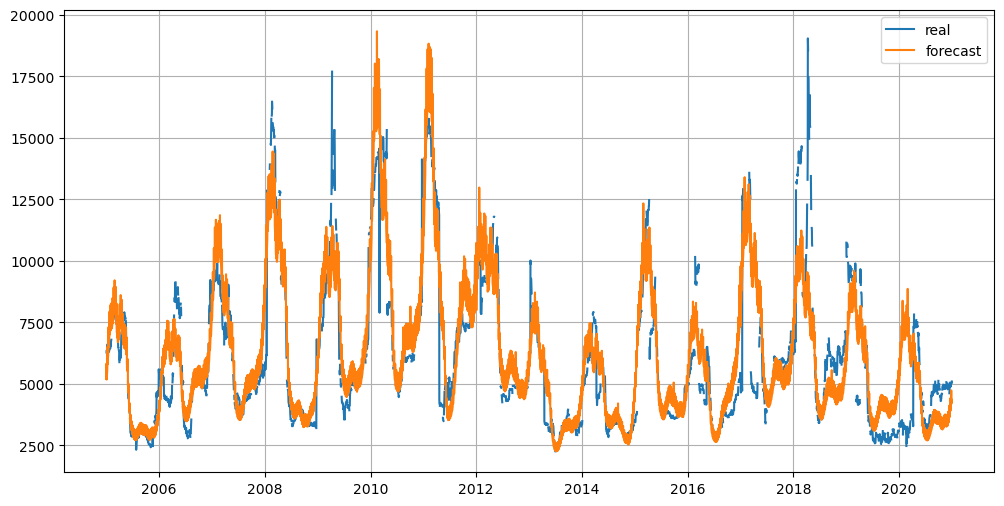

In [37]:
plt.figure(figsize=(12,6))
plt.plot(df['ds'], df['y'], label='real')
plt.plot(forecast['ds'], forecast['yhat'], label='forecast')
plt.grid()
plt.legend()
plt.show()

In [38]:
con = pd.concat([df, forecast], axis=1)
con = con.dropna(axis=0)
df1 = con[df.columns]
forecast1 = con[forecast.columns]

In [39]:
y_true= df1['y'].values
y_pred = forecast1['yhat'].values
mae = mean_absolute_error(y_true, y_pred)
print('Mean Absolute Error: %.3f' % mae)

Mean Absolute Error: 993.484


In [40]:
evaluation_model = cross_validation(final_model, initial='720 days', period='180 days', horizon = '30 days')
evaluation_metrix = performance_metrics(evaluation_model)
evaluation_metrix.sort_values('mae').head(5)

INFO:prophet:Making 27 forecasts with cutoffs between 2007-02-07 00:00:00 and 2019-12-01 00:00:00


  0%|          | 0/27 [00:00<?, ?it/s]

KeyboardInterrupt: 